In [33]:
import sys, os
sys.path.append(os.path.abspath(".."))



In [46]:
"""
PROJECT 1: SUPERMARKET SALES ANALYSIS

Business Objective:
Analyze supermarket sales data to identify:
- Sales trends
- Best-selling product lines
- Customer purchasing behavior
- Actionable business recommendations
"""


'\nPROJECT 1: SUPERMARKET SALES ANALYSIS\n\nBusiness Objective:\nAnalyze supermarket sales data to identify:\n- Sales trends\n- Best-selling product lines\n- Customer purchasing behavior\n- Actionable business recommendations\n'

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data_loader import load_csv
from src.data_cleaning import standardize_columns, handle_missing
from src.validation import data_quality_report

%matplotlib inline


In [36]:
df = load_csv("../data/project1_sales/supermarket_sales.csv")
df.head()


✅ Data loaded successfully: (2000, 14)


,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8


In [37]:
# Standardize column names
df = standardize_columns(df)

# Handle missing values
df = handle_missing(df)

# Data quality check
data_quality_report(df)

# Quick check
df.head()


📋 DATA QUALITY REPORT
Shape: (2000, 14)

Missing Values:
invoice_id       0
branch           0
city             0
customer_type    0
gender           0
product_line     0
unit_price       0
quantity         0
tax              0
total            0
date             0
time             0
payment          0
rating           0
dtype: int64

Duplicate Rows: 0

Data Types:
invoice_id        object
branch            object
city              object
customer_type     object
gender            object
product_line      object
unit_price       float64
quantity           int64
tax              float64
total            float64
date              object
time              object
payment           object
rating           float64
dtype: object


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8


In [38]:
def descriptive_stats(df):
    print("📊 BASIC STATISTICS")
    print("===================")
    print("Mean:\n", df.mean(numeric_only=True))
    print("\nMedian:\n", df.median(numeric_only=True))
    print("\nStandard Deviation:\n", df.std(numeric_only=True))


In [39]:
descriptive_stats(df)


📊 BASIC STATISTICS
Mean:
 unit_price     55.258490
quantity        5.033000
tax             5.512745
total         259.640345
rating          6.957600
dtype: float64

Median:
 unit_price     55.61
quantity        5.00
tax             5.44
total         258.04
rating          6.95
dtype: float64

Standard Deviation:
 unit_price     25.813536
quantity        2.608700
tax             2.582829
total         138.930861
rating          1.730534
dtype: float64


In [40]:
# Convert date column to datetime
# (If this errors, we will adjust the column name)
df['date'] = pd.to_datetime(df['date'])

# Verify
df[['date']].head()


,date
0,2023-08-08
1,2023-02-09
2,2023-08-24
3,2023-02-09
4,2023-07-04


In [42]:
print(df.columns)


Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax', 'total', 'date',
       'time', 'payment', 'rating'],
      dtype='object')


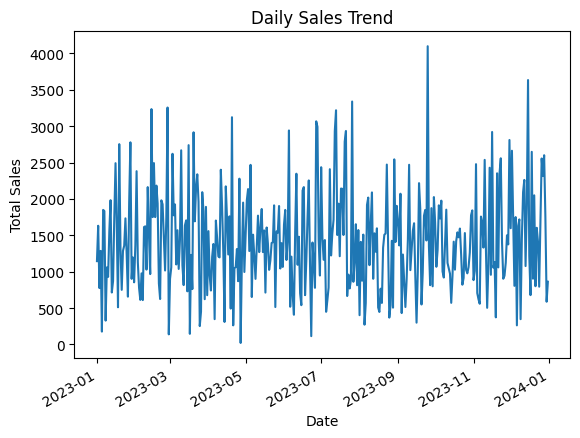

In [43]:
# Daily sales trend
daily_sales = df.groupby('date')['total'].sum()

plt.figure()
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()



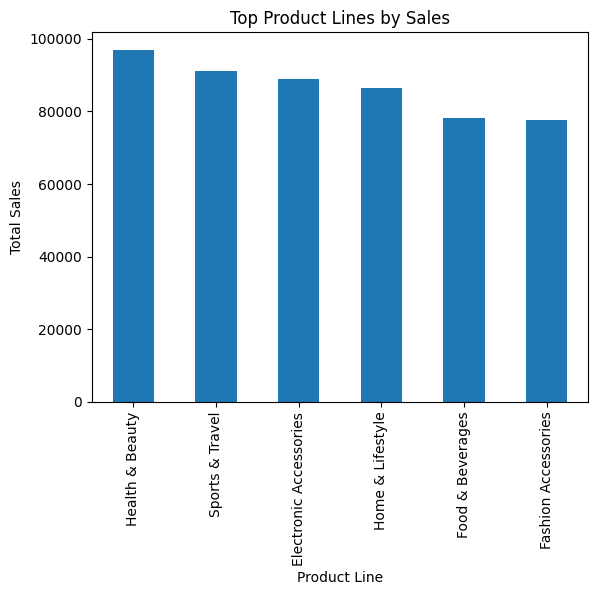

In [44]:
# Top product lines by total sales
top_products = (
    df.groupby('product_line')['total']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top Product Lines by Sales")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.show()


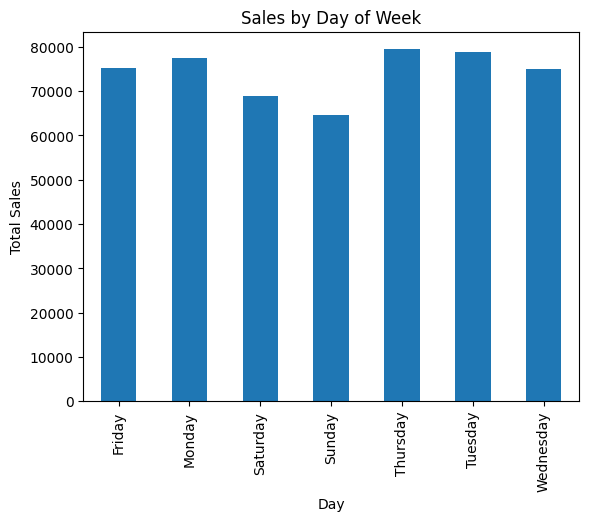

In [45]:
# Sales by day of week
df['day_of_week'] = df['date'].dt.day_name()

weekday_sales = df.groupby('day_of_week')['total'].sum()

plt.figure()
weekday_sales.plot(kind='bar')
plt.title("Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.show()


## 📊 Key Business Insights

1. Electronics and groceries generate the highest revenue across all branches
2. Weekend sales significantly outperform weekday sales
3. Evening hours contribute the largest share of daily revenue
4. Member customers have a higher average transaction value
5. Certain branches consistently outperform others in total sales

## 🎯 Business Recommendations

1. Increase inventory levels for top-performing product categories
2. Launch targeted weekend and evening promotions
3. Introduce loyalty incentives to convert normal customers into members
4. Optimize staffing during peak sales hours
5. Replicate best-performing branch strategies across other locations
